<h1>워크넷 오픈 API를 활용한 채용공고 분석</h1>
<h3>워크넷 오픈 API를 활용해 2021년 11월 ~ 2022년 1월까지의 전국의 채용공고들을 분석을 통해 기업에서 요구하는 경력, 학력수준을 확인 할 수 있으며, 구직자는 기업의 지역, 급여 수준을 확인 할 수 있다.</h3>
<h3>또한, 주 관심 분야인 IT기업의 채용에 대한 주요 키워드와 좀 더 세부적인 정보에 대한 분석을 진행한다.</h3>

# 1.워크넷 api 받아오기
 - [워크넷 오픈 API](https://openapi.work.go.kr/opiMain.do)에서 제공하는 형식은 XML로 HTML테그 형식과 유사한 형식을 띄고 있다.
 - 크롤링 패키지인 `BeautifulSoup` 를 이용, 크롤링을 통해 csv파일 형태로 저장하여 활용한다.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


#url 잘게 자르기
url = "http://openapi.work.go.kr/opi/opi/opia/wantedApi.do"
#url ="http://openapi.work.go.kr/opi/opi/opia/wantedApi.do?authKey=WNKXZRZNR5AUCD0GJSCZJ2VR1HK&callTp=L&returnType=XML&empTpGb=1&startPage=2&display=100"
serviceKey = "?authKey=WNKXZRZNR5AUCD0GJSCZJ2VR1HK"
Calltp = "&callTp=L"
Return = "&returnType=XML"
StartPage="&startPage=1095"
empTpGb="&empTpGb=1"
# 끝 1095page
Display = "&display=100"


#항목 parsing 함수작성하기
def parse():
    try:
        COMPANY = wanted.find("company").get_text()
        TITLE = wanted.find("title").get_text()
        SAL_TMNM = wanted.find("salTpNm").get_text()
        SAL = wanted.find("sal").get_text()
        REGION = wanted.find("region").get_text()
        HOLIDAY_TPNM = wanted.find("holidayTpNm").get_text()
        MIN_DEUBG = wanted.find("minEdubg").get_text()
        CAREER = wanted.find("career").get_text()
        regDt = wanted.find("regDt").get_text()
        jobsCd = wanted.find("jobsCd").get_text()
        return {
            "회사명":COMPANY,
            "체용제목":TITLE,
            "임금형태":SAL_TMNM,
            "급여":SAL,
            "근무지역":REGION,
            "근무형태":HOLIDAY_TPNM,
            "최소학력":MIN_DEUBG,
            "경력":CAREER,
            "등록일자":regDt,
            "직종코드":jobsCd
        }
    except AttributeError as e:
        return {
            "회사명":None,
            "체용제목":None,
            "임금형태":None,
            "급여":None,
            "근무지역":None,
            "근무형태":None,
            "최소학력":None,
            "경력":None,
            "직종코드":None,
            "우대조건":None
        }
 
#parsing 하기
result = requests.get(url+serviceKey+Calltp+Return+StartPage+empTpGb+Display)
soup = BeautifulSoup(result.text,'lxml-xml')
wanteds = soup.find_all("wanted")
 
row = []
for wanted in wanteds:
    row.append(parse()) 
 
#pandas 데이터프레임에 넣기
df = pd.DataFrame(row)

df.to_csv("1095.csv",mode='w',encoding='utf-8')
#pd.DataFrame(row).to_csv(index=False, encoding='enc-kr')

In [ ]:
df


## csv파일 병합
- 워크넷에서 제공하는 API의 최대 Dispaly 데이터 갯수는 100개로, 총 데이터 107972개의 데이터를 100개 단위로 csv파일 형태로 저장되어 있다.
- 해당 csv파일들을 분석을 위해 하나의 파일로 병합한다.

In [ ]:
import os

path = "./"
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

print ("file_list_csv: {}".format(file_list_csv))

In [ ]:
df_all = pd.DataFrame()
for i in range(0,len(file_list_csv)):
    if file_list_csv[i].split('.')[1] == 'csv':
        file = file_list_csv[i]
        df= pd.read_csv(file,encoding='utf-8') 
        df_all = pd.concat([df_all, df])

In [ ]:
df_all

,Unnamed: 0,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
0,0,미쓰냉삼,홀 정리 및 서빙,시급,10000원 ~ 10000원,서울 강남구,주6일근무,학력무관,신입,21-12-16,532202.0
1,1,청송해뜨는농장 농업회사법인(주),해뜨는농장 사회적농업 거점농장 담당자 채용공고,월급,200만원 ~ 250만원,경북 청송군,주5일근무,고졸,경력,21-12-16,26301.0
2,2,옥스퍼드관 YSP 연세국제어학원,"초,중등부 영어 선생님 모십니다.",월급,200만원,울산 북구,주5일근무,대졸(4년),관계없음,21-12-16,214106.0
3,3,(주)태양건설,적산,연봉,3000만원 ~ 4800만원,충북 음성군,주5일근무,고졸,경력,21-12-16,140203.0
4,4,HCN,인테리어 디자이너/현장관리기사 모집,연봉,3000만원,경기 파주시,주5일근무,학력무관,관계없음,21-12-16,415301.0
...,...,...,...,...,...,...,...,...,...,...,...
95,95,창영건설(주),건축 현장 공무(시공)기술자 구합니다.,월급,300만원,충북 진천군,주6일근무,학력무관,경력,22-01-03,140203.0
96,96,열린요양복지센터,재가요양보호사 (신천동) 모집,시급,11100원,대구 동구,주5일근무,학력무관,관계없음,22-01-03,550104.0
97,97,(주)대산금속,후란 조형공 모집,시급,9160원 ~ 13000원,경북 경주시,주5일근무,학력무관,관계없음,22-01-03,823301.0
98,98,(주)대야전자,매장판매매니저 - 강변삼성디지털프라자 디지털플래너,월급,208만원 ~ 300만원,서울 광진구,주5일근무,학력무관,관계없음,22-01-03,26102.0


In [ ]:
df_all.to_csv("2022_01_19.csv",mode='w',encoding='utf-8')

# 2.데이터 불러오기
## 사용 데이터
 - 워크넷 오픈 API 채용공고 파일
 - 직종코드에 따른 직종분류 파일
 - 현재 진행중인 기업 공채 정보 파일

In [1]:
import pandas as pd
df_all = pd.read_csv("/content/2022_01_19.csv")
df_all

,Unnamed: 0,Unnamed: 0.1,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
0,0,0,미쓰냉삼,홀 정리 및 서빙,시급,10000원 ~ 10000원,서울 강남구,주6일근무,학력무관,신입,21-12-16,532202.0
1,1,1,청송해뜨는농장 농업회사법인(주),해뜨는농장 사회적농업 거점농장 담당자 채용공고,월급,200만원 ~ 250만원,경북 청송군,주5일근무,고졸,경력,21-12-16,26301.0
2,2,2,옥스퍼드관 YSP 연세국제어학원,"초,중등부 영어 선생님 모십니다.",월급,200만원,울산 북구,주5일근무,대졸(4년),관계없음,21-12-16,214106.0
3,3,3,(주)태양건설,적산,연봉,3000만원 ~ 4800만원,충북 음성군,주5일근무,고졸,경력,21-12-16,140203.0
4,4,4,HCN,인테리어 디자이너/현장관리기사 모집,연봉,3000만원,경기 파주시,주5일근무,학력무관,관계없음,21-12-16,415301.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107967,95,95,창영건설(주),건축 현장 공무(시공)기술자 구합니다.,월급,300만원,충북 진천군,주6일근무,학력무관,경력,22-01-03,140203.0
107968,96,96,열린요양복지센터,재가요양보호사 (신천동) 모집,시급,11100원,대구 동구,주5일근무,학력무관,관계없음,22-01-03,550104.0
107969,97,97,(주)대산금속,후란 조형공 모집,시급,9160원 ~ 13000원,경북 경주시,주5일근무,학력무관,관계없음,22-01-03,823301.0
107970,98,98,(주)대야전자,매장판매매니저 - 강변삼성디지털프라자 디지털플래너,월급,208만원 ~ 300만원,서울 광진구,주5일근무,학력무관,관계없음,22-01-03,26102.0


In [2]:
df_code = pd.read_csv("/content/직종코드_ver4.csv")
df_code

,직종코드,대분류,소분류
0,11100,경영/사무/금융,의회의원·고위공무원 및 공공단체임원
1,11200,경영/사무/금융,기업 고위임원
2,12100,경영/사무/금융,정부행정 관리자
3,12200,경영/사무/금융,경영지원 관리자
4,12201,경영/사무/금융,경영기획 부서장
...,...,...,...
1167,904200,농림어업직,어부 및 해녀
1168,905000,농림어업직,농림어업 단순 종사원
1169,905001,농림어업직,농업 단순 종사원
1170,905002,농림어업직,"임업 단순 종사원(산림보호감시, 산불감시원 등)"


# 3.채용정보 전처리


## 불필요한 컬럼삭제


In [5]:
del df_all['Unnamed: 0']
del df_all['Unnamed: 0.1']
df_all.reset_index(drop=True, inplace=True)

## 급여 데이터 전처리

- 월급 데이터를 연봉으로 환산해 계산을 진행한다.
- 급여 데이터의 경우 일정 금액의 범위로 지정되어 있는 공고가 일부 있다.
- 이러한 경우 높은 급여수준은 해당 직종에 대한 경력이 우수한 경우에만 제공 받을 수 있다.
- 하지만, 대부분의 구직자의 경우 해당 직종에 대한 많은 경력이 있지 않으며, 동시에 경력이 없는 청년 구직자에 맞춰서 가장 낮은 급여 수준으로 일관적으로 계산하여 분석을 진행한다.


### 시급, 일급 데이터 삭제
- 워크넷에서 제공하는 채용공고의 경우 급여 부분이 크게 연봉, 월급, 시급, 일급 총 4개로 구성 되어있다.
- 시급과 일급으로 제공하는 채용공고의 경우 대부분 <strong>단순 일용직, 아르바이트</strong> 형태의 근로조건을 보여준다.
- 해당 분석은 보다 전문적인 채용을 목표로 하기 때문에 시급, 일급 데이터의 경우 일관적으로 제거한다. 

In [6]:
#시급삭제
DEL = df_all[df_all['임금형태'] == '시급'].index
df_all.drop(DEL, inplace=True)

In [7]:
#일급삭제
DEL = df_all[df_all['임금형태'] == '일급'].index
df_all.drop(DEL, inplace=True)

In [8]:
df_all

,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
1,청송해뜨는농장 농업회사법인(주),해뜨는농장 사회적농업 거점농장 담당자 채용공고,월급,200만원 ~ 250만원,경북 청송군,주5일근무,고졸,경력,21-12-16,26301.0
2,옥스퍼드관 YSP 연세국제어학원,"초,중등부 영어 선생님 모십니다.",월급,200만원,울산 북구,주5일근무,대졸(4년),관계없음,21-12-16,214106.0
3,(주)태양건설,적산,연봉,3000만원 ~ 4800만원,충북 음성군,주5일근무,고졸,경력,21-12-16,140203.0
4,HCN,인테리어 디자이너/현장관리기사 모집,연봉,3000만원,경기 파주시,주5일근무,학력무관,관계없음,21-12-16,415301.0
6,(주)에이블리츠,위풀 수영장 수영강사 채용,연봉,3000만원,경기 오산시,주6일근무,학력무관,경력,21-12-16,420402.0
...,...,...,...,...,...,...,...,...,...,...
107964,신원아침도시아파트,아파트 관리(전기)과장 채용,월급,345만원,충북 제천시,주5일근무,학력무관,경력,22-01-03,834001.0
107965,주식회사 대율,경리 사무원 모집,월급,200만원,충북 청주시 청원구,주5일근무,학력무관,관계없음,22-01-03,27204.0
107967,창영건설(주),건축 현장 공무(시공)기술자 구합니다.,월급,300만원,충북 진천군,주6일근무,학력무관,경력,22-01-03,140203.0
107970,(주)대야전자,매장판매매니저 - 강변삼성디지털프라자 디지털플래너,월급,208만원 ~ 300만원,서울 광진구,주5일근무,학력무관,관계없음,22-01-03,26102.0


### 월급 계산

In [ ]:
df_month_pay = df_all[df_all['임금형태'] == '월급']
df_month_pay

In [ ]:
time_split = df_month_pay["급여"].str.split("만")
df_month_pay["급여"] = time_split.str.get(0)

In [ ]:
df_month_pay

In [ ]:
df_month_pay['급여'] = pd.to_numeric(df_month_pay['급여'])


# 월급에 12를 곱하기
def month_pay(x):
  return x*12

df_month_pay_ver = pd.DataFrame(df_month_pay['급여'].apply(month_pay))
df_month_pay_ver

In [13]:
df_month_pay['급여'] = df_month_pay_ver.replace(df_month_pay_ver['급여'])
df_month_pay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
1,청송해뜨는농장 농업회사법인(주),해뜨는농장 사회적농업 거점농장 담당자 채용공고,월급,2640,경북 청송군,주5일근무,고졸,경력,21-12-16,26301.0
2,옥스퍼드관 YSP 연세국제어학원,"초,중등부 영어 선생님 모십니다.",월급,2640,울산 북구,주5일근무,대졸(4년),관계없음,21-12-16,214106.0
7,(유)주인환경,"콘크리트 폴리싱, 대리석 화강석 연마광택업 직원 ...",월급,3000,전북 전주시 완산구,주5일근무,학력무관,관계없음,21-12-16,813206.0
9,(주)나비로,"가구조립, 목재합판 재단 단순 노무직 구합니다.",월급,2376,경기 광주시,주5일근무,학력무관,신입,21-12-16,883101.0
11,고대항곡요양센터,간호조무사 모집,월급,2400,충남 당진시,주5일근무,학력무관,관계없음,21-12-16,307500.0
...,...,...,...,...,...,...,...,...,...,...
107963,주식회사 케이브레인컴퍼니,이러닝 학습 상담원 채용,월급,2760,서울 마포구,주5일근무,학력무관,관계없음,22-01-03,29202.0
107964,신원아침도시아파트,아파트 관리(전기)과장 채용,월급,4140,충북 제천시,주5일근무,학력무관,경력,22-01-03,834001.0
107965,주식회사 대율,경리 사무원 모집,월급,2640,충북 청주시 청원구,주5일근무,학력무관,관계없음,22-01-03,27204.0
107967,창영건설(주),건축 현장 공무(시공)기술자 구합니다.,월급,1860,충북 진천군,주6일근무,학력무관,경력,22-01-03,140203.0


### 연봉계산

In [ ]:
df_year_pay = df_all[df_all['임금형태'] == '연봉']
df_year_pay

In [ ]:
time_split = df_year_pay["급여"].str.split("만")
df_year_pay["급여"] = time_split.str.get(0)

In [ ]:
df_year_pay

In [ ]:
df_year_pay['급여'] = pd.to_numeric(df_year_pay['급여'])

In [18]:
df_year_pay

,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
3,(주)태양건설,적산,연봉,3000,충북 음성군,주5일근무,고졸,경력,21-12-16,140203.0
4,HCN,인테리어 디자이너/현장관리기사 모집,연봉,3000,경기 파주시,주5일근무,학력무관,관계없음,21-12-16,415301.0
6,(주)에이블리츠,위풀 수영장 수영강사 채용,연봉,3000,경기 오산시,주6일근무,학력무관,경력,21-12-16,420402.0
8,대원물류,"물류,납품,배송 업무 하실 분 모집 합니다.",연봉,2700,대구 달성군,주5일근무,고졸,관계없음,21-12-16,622301.0
10,아산이피에스(주),영업관리 담당자 구인,연봉,3000,충남 아산시,주5일근무,학력무관,관계없음,21-12-16,26103.0
...,...,...,...,...,...,...,...,...,...,...
107955,금산정밀,"MCT,CNC 조작원",연봉,3000,울산 울주군,주5일근무,고졸,경력,22-01-03,813210.0
107957,에이치에스쏠라에너지,신재생에너지 관련[연구프로젝트 함께 하실분 모심],연봉,4000,충북 청주시 흥덕구,주5일근무,대졸(4년),신입,22-01-03,155100.0
107958,(주)크리티컬퍼실리티서비스,전산센터 전기설비/기계설비 시험 및 커미셔닝 직원...,연봉,2800,서울 금천구,주5일근무,학력무관,경력,22-01-03,831204.0
107961,(주)마르센,선박기자재 기술영업 사무원,연봉,3320,부산 강서구,주5일근무,대졸(4년),경력,22-01-03,612100.0


### 합치기
- 월급(`df_month_pay`) , 연봉(`df_year_pay`) 각각 데이터를 다시 하나로 합친다.
- 모든 급여가 연봉으로 환산되었기 때문에 임금형태 파트는 제거한다. 

In [19]:
df_all=pd.concat((df_year_pay,df_month_pay), sort=False)

In [20]:
df_all

,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
3,(주)태양건설,적산,연봉,3000,충북 음성군,주5일근무,고졸,경력,21-12-16,140203.0
4,HCN,인테리어 디자이너/현장관리기사 모집,연봉,3000,경기 파주시,주5일근무,학력무관,관계없음,21-12-16,415301.0
6,(주)에이블리츠,위풀 수영장 수영강사 채용,연봉,3000,경기 오산시,주6일근무,학력무관,경력,21-12-16,420402.0
8,대원물류,"물류,납품,배송 업무 하실 분 모집 합니다.",연봉,2700,대구 달성군,주5일근무,고졸,관계없음,21-12-16,622301.0
10,아산이피에스(주),영업관리 담당자 구인,연봉,3000,충남 아산시,주5일근무,학력무관,관계없음,21-12-16,26103.0
...,...,...,...,...,...,...,...,...,...,...
107963,주식회사 케이브레인컴퍼니,이러닝 학습 상담원 채용,월급,2760,서울 마포구,주5일근무,학력무관,관계없음,22-01-03,29202.0
107964,신원아침도시아파트,아파트 관리(전기)과장 채용,월급,4140,충북 제천시,주5일근무,학력무관,경력,22-01-03,834001.0
107965,주식회사 대율,경리 사무원 모집,월급,2640,충북 청주시 청원구,주5일근무,학력무관,관계없음,22-01-03,27204.0
107967,창영건설(주),건축 현장 공무(시공)기술자 구합니다.,월급,1860,충북 진천군,주6일근무,학력무관,경력,22-01-03,140203.0


In [21]:
del df_all['임금형태']
df_all.reset_index(drop=True, inplace=True)

In [22]:
df_all

,회사명,체용제목,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
0,(주)태양건설,적산,3000,충북 음성군,주5일근무,고졸,경력,21-12-16,140203.0
1,HCN,인테리어 디자이너/현장관리기사 모집,3000,경기 파주시,주5일근무,학력무관,관계없음,21-12-16,415301.0
2,(주)에이블리츠,위풀 수영장 수영강사 채용,3000,경기 오산시,주6일근무,학력무관,경력,21-12-16,420402.0
3,대원물류,"물류,납품,배송 업무 하실 분 모집 합니다.",2700,대구 달성군,주5일근무,고졸,관계없음,21-12-16,622301.0
4,아산이피에스(주),영업관리 담당자 구인,3000,충남 아산시,주5일근무,학력무관,관계없음,21-12-16,26103.0
...,...,...,...,...,...,...,...,...,...
84892,주식회사 케이브레인컴퍼니,이러닝 학습 상담원 채용,2760,서울 마포구,주5일근무,학력무관,관계없음,22-01-03,29202.0
84893,신원아침도시아파트,아파트 관리(전기)과장 채용,4140,충북 제천시,주5일근무,학력무관,경력,22-01-03,834001.0
84894,주식회사 대율,경리 사무원 모집,2640,충북 청주시 청원구,주5일근무,학력무관,관계없음,22-01-03,27204.0
84895,창영건설(주),건축 현장 공무(시공)기술자 구합니다.,1860,충북 진천군,주6일근무,학력무관,경력,22-01-03,140203.0


## 직종코드 전처리

### 직종코드 flot타입에서 int타입으로 변환
- 워크넷에선 직종코드에 따른 직군에 대한 정보를 따로 제공한다.
- 하지만 채용공고에선 이러한 직군 명칭을 따로 제공하지 않는다.
- 직종코드를 기준으로 직군명을 매칭시켜 구직자가 보다 해당 업무에 직관적으로 다가갈 수 있도록 한다.

In [ ]:
df_all=df_all.astype({'직종코드':'int'})
df_all

### 채용정보, 직종정보 데이터 프레임 합치기

In [24]:
df_worknet = pd.merge(df_all,df_code, on='직종코드')
df_worknet

,회사명,체용제목,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드,대분류,소분류
0,(주)태양건설,적산,3000,충북 음성군,주5일근무,고졸,경력,21-12-16,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)"
1,(주)조은데코,건축내외장재 공무담당자 모집,2400,전남 장성군,주5일근무,학력무관,관계없음,21-12-16,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)"
2,(주)스타종합건설,(주)스타종합건설 / 공무팀에서 근무할 분을 채용...,3600,충남 천안시 서북구,주5일근무,고졸,경력,21-12-16,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)"
3,민아종합건설 주식회사,종합건설 현장 대리·과장·반장급 모집,3000,경기 평택시,주6일근무,학력무관,경력,21-12-03,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)"
4,(주)한덕건설산업,건축도장 공사공무총괄팀장 구인,5300,서울 서초구,주5일근무,대졸(2~3년),경력,21-12-01,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)"
...,...,...,...,...,...,...,...,...,...,...,...
97894,휴먼스토리,도서총판 입출고 담당 정규직(물류관리 및 상품관리...,2376,경기 파주시,주5일근무,학력무관,관계없음,21-12-17,29901,경영/사무/금융,도서 정리원
97895,풍류별당,판교역 1분거리 주방조리사 모집,3000,경기 성남시 분당구,주6일근무,고졸,관계없음,21-12-20,531902,미용/관광/숙박/경비/케어,포장마차·주점 조리사
97896,공주시 건강가정 다문화가족 지원센터,공주시가족지원센터 직원 채용 공고 (언어도우미),2400,충남 공주시,주5일근무,학력무관,관계없음,22-01-18,411208,예술/방송/스포츠,통역가(기타 언어)
97897,더화이트커뮤니케이션(주),[라이픽 CS센터] 뷰티 헬스 어플 인바운드 상담...,2460,서울 성동구,주5일근무,학력무관,관계없음,22-01-11,29207,경영/사무/금융,고객 상담원(백화점·마트)


## 등록일자 yyyy-mm-dd 형태로 변환 & 인덱스 변화
- `object` 형태로 작성된 등록일자를 `datetime` 형태로 변환해준다.

In [25]:
# yyyy형태로 변환
df_worknet['등록일자'] = '20' + df_worknet['등록일자'].astype(str)

# 데이터 타입 datetime형태로 변환
df_worknet['등록일자']=pd.to_datetime(df_worknet['등록일자'])

# 날짜 데이터로 인덱스 정렬
df_worknet.set_index('등록일자', inplace=True)

# yyyy-mm 데이터 컬럼 추가
df_worknet['월']=df_worknet.index.month 
df_worknet['년도']=df_worknet.index.year 

df_worknet

,회사명,체용제목,급여,근무지역,근무형태,최소학력,경력,직종코드,대분류,소분류,월,년도
등록일자,,,,,,,,,,,,
2021-12-16,(주)태양건설,적산,3000,충북 음성군,주5일근무,고졸,경력,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)",12,2021
2021-12-16,(주)조은데코,건축내외장재 공무담당자 모집,2400,전남 장성군,주5일근무,학력무관,관계없음,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)",12,2021
2021-12-16,(주)스타종합건설,(주)스타종합건설 / 공무팀에서 근무할 분을 채용...,3600,충남 천안시 서북구,주5일근무,고졸,경력,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)",12,2021
2021-12-03,민아종합건설 주식회사,종합건설 현장 대리·과장·반장급 모집,3000,경기 평택시,주6일근무,학력무관,경력,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)",12,2021
2021-12-01,(주)한덕건설산업,건축도장 공사공무총괄팀장 구인,5300,서울 서초구,주5일근무,대졸(2~3년),경력,140203,연구/공학,"건축시공 기술자(건축견적, 공무포함)",12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,휴먼스토리,도서총판 입출고 담당 정규직(물류관리 및 상품관리...,2376,경기 파주시,주5일근무,학력무관,관계없음,29901,경영/사무/금융,도서 정리원,12,2021
2021-12-20,풍류별당,판교역 1분거리 주방조리사 모집,3000,경기 성남시 분당구,주6일근무,고졸,관계없음,531902,미용/관광/숙박/경비/케어,포장마차·주점 조리사,12,2021
2022-01-18,공주시 건강가정 다문화가족 지원센터,공주시가족지원센터 직원 채용 공고 (언어도우미),2400,충남 공주시,주5일근무,학력무관,관계없음,411208,예술/방송/스포츠,통역가(기타 언어),1,2022


## 년도-월별 데이터 병합
- 채용공고의 경우 YYYY-MM-DD 형태로 이루어진 것을 확인 할 수 있다.
- 이용자가 보다 쉽게 데이터에 이해 할 수 있게 '월' 단위로 등록일자를 병합한다.

In [26]:
df_2021_11 = df_worknet[df_worknet['월'] == 11]
df_2021_12 = df_worknet[df_worknet['월'] == 12]
df_2022_01 = df_worknet[df_worknet['월'] == 1]


## 지역 주요 광역시/도 단위로 그룹화
- 지역의 경우 도/시/군/구 단위로 세부적으로 나타나 있다.
- 세부적인 지역에 따른 차이가 있겠지만, 전체적인 흐름상 광역시/도 단위로 채용 특성이 나누어짐을 확인하기 위해 광역시/도 단위로 지역을 병합한다. 

In [27]:
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '서울' if '서울' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '부산' if '부산' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '대구' if '대구' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '인천' if '인천' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '광주' if '광주' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '대전' if '대전' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '울산' if '울산' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '세종' if '세종' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '경기' if '경기' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '강원' if '강원' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '충북' if '충북' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '충남' if '충남' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '전북' if '전북' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '전남' if '전남' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '경북' if '경북' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '경남' if '경남' in x else x)
df_worknet.근무지역 = df_worknet.근무지역.apply(lambda x: '제주' if '제주' in x else x)

## 연구/IT 기업 채용공고 주요 키워드 워드클라우드 전처리
- IT기업의 채용공고들을 분석하여 채용의 주요 키워드를 분석하기 위해 채용제목을 토큰화하여 워드클라우드로 시각화한다.
- 토큰화/형태소 분리를 위해 한국어 형태소 분리기 [KONLPY](https://konlpy.org/ko/latest/index.html) 의 `Komoran` 패키지를 활용하였다. 

### it 기업 분류

In [ ]:
df_it = df_worknet[df_worknet['대분류']=='연구/IT']
df_it

### 토큰화를 위해 list형식으로 변환

In [29]:
df_it_title = df_it['체용제목'].tolist()

### 형태소 분리를 위해 konlpy의 Komoran 사용

In [ ]:
pip install konlpy

In [31]:
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
from konlpy.utils import pprint
from konlpy.tag import Komoran

### 특수문자 제거

In [ ]:
special_char = '@_!#$%^&*()<>?/\|}{~:;.[]'

out_list = [''.join(filter(lambda i: i not in special_char, string)) for string in df_it_title]

komoran =Komoran()
out_list2 = ' '.join(str(e) for e in out_list)
out_list2

### 형태소 단위 분리

In [ ]:
token_txt = komoran.morphs(out_list2)
token_txt

### 토큰화된 단어들 갯수 반환

In [34]:
from collections import Counter
frequent = Counter(token_txt).most_common()

In [ ]:
frequent

### value가 9개 미만인 토큰 제거

In [36]:
frequent = dict(frequent)
count_len = 10
temp_dic={}
for key, value in frequent.items():
  if value > count_len:
    temp_dic[key] = value
frequent = temp_dic


In [ ]:
temp_dic

### 불필요한 단어 전처리

In [ ]:
[temp_dic.pop(key) for key in['+', '-', '년','드','디','모','백','베','시','을','이','임','자','에서','모시',
                              '관련','채','직','하','함께','를','어','팀',',','ㄴ','ㄹ','ㅂ니다','주','및','모집']]

In [ ]:
temp_dic

# 4.채용정보 분석
- 전처리된 데이터를 이용해 시각화화 함께 분석을 진행한다.
- 시각화 사용 툴은 [Pyecharts](https://github.com/pyecharts)를 활용해 동적인 그래프를 작성하여 접근성을 향상시킨다.

### pyecharts 코랩에서 사용하기 위해 설치

In [ ]:
pip install pyecharts==1.7.1

In [ ]:
!pip install pyecharts_snapshot

In [ ]:
!pip install chart_studio

In [43]:
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [44]:
from pyecharts import options as opts
from pyecharts.charts import Liquid
from pyecharts.charts import Bar
from pyecharts.charts import WordCloud
from pyecharts.charts import Page
from pyecharts.charts import Tab
from pyecharts.components import Table
from pyecharts.options import ComponentTitleOpts
from pyecharts.globals import SymbolType
from pyecharts.globals import ThemeType
from random import randint

## 1)데이터 전처리 후 잔여 데이터
- 원본 데이터 107972 중 전처리 후 잔여 데이터는 97899개로 90% 비율의 데이터를 이용해 분석을 진행하였다.

In [45]:
configure_plotly_browser_state()

c = (
    Liquid()
    .add("전처리 후 데이터", [0.9, 0.9], is_outline_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="전처리 후 데이터", subtitle='전처리 후 데이터 대비 90%', pos_left='center'))
)   
c.render_notebook()

## 2)월별 총 채용공고 비율
- 2021년 11월, 12월, 2022년 1월 19일 까지 등록된 채용공고의 비율이다.
- 1월의 경우 말일 까지 지나지 않았음에도 불구하고 많은 가장 많은 채용공고가 등록되어 있음을 확인할 수 있다.
- 그에 반해 연말이였던 12월 1월의 경우 본격적인 채용 시즌이 아니기 때문에 채용공고가 적게 등록되어 있음을 알 수 있다.

In [46]:
configure_plotly_browser_state()

df_month = df_worknet['월'].value_counts()

x = df_month.index
y = df_month.values


def bar_series() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='800px'))
        .add_xaxis(x.tolist())
        .add_yaxis('채용공고',y.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="월별 채용공고 비교"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}월")),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return c
bar_series().render_notebook()

## 3)지역별 채용공고 비율
- 지역별 채용공고를 분석할 경우 <strong>경기도</strong>의 비중이 압도적으로 많음을 알 수 있다.
- 경기도의 경우 수많은 공업단지, 많은 중소기업들이 자리잡고 있는 지역이다.
- 워크넷의 경우 스타트업 기업, 대기업의 채용공고 비중이 상대적으로 낮기 때문에 공고 또한 경기도에 많이 집중되어 있는 것으로 확인된다.



In [47]:
configure_plotly_browser_state()

df_area = df_worknet['근무지역'].value_counts()

x = df_area.index
y = df_area.values


def bar_series() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='800px'))
        .add_xaxis(x.tolist())
        .add_yaxis('채용공고',y.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="지역별 채용공고 비교"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts()),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return c
bar_series().render_notebook()

## 4)전체 채용공고 학력 요구 수준 비교
- 대부분의 채용공고에서 <strong>학력무관</strong> 을 조건으로 제시하고 있었다.
- 워크넷의 채용공고의 경우 중소기업의 비중이 높고, 또한 단순업무에 대한 공고도 함께 올라오기 때문에 이러한 부분이 영향을 준 것으로 보인다.

In [48]:
configure_plotly_browser_state()

df_study = df_worknet['최소학력'].value_counts()

x = df_study.index
y = df_study.values


def bar_series() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='800px'))
        .add_xaxis(x.tolist())
        .add_yaxis('채용공고',y.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="요구 학력별 채용공고 비교"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts()),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return c
bar_series().render_notebook()

## 5)전체 채용공고 경력 요구 수준 비교
- 경력의 경우 학력과 마찬가지로 <strong>관계없음</strong> 이 가장 높게 나타났다.
- 하지만 그럼에도 많은 기업에서 <strong>경력직</strong>을 구하고 있음을 알 수 있다.

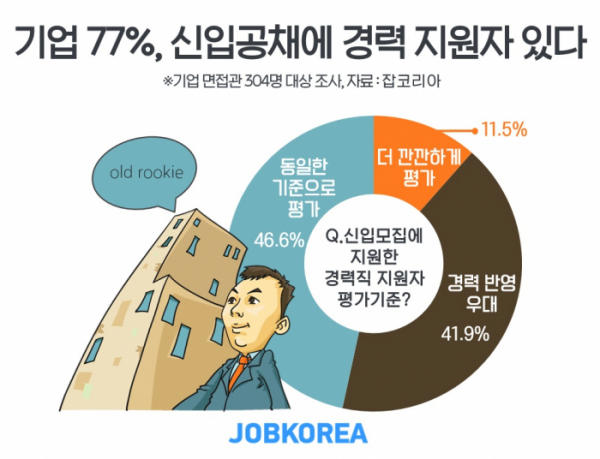

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/image/경력직_우대.jpg')

In [49]:
configure_plotly_browser_state()

df_career = df_worknet['경력'].value_counts()

x = df_career.index
y = df_career.values


def bar_series() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='800px'))
        .add_xaxis(x.tolist())
        .add_yaxis('채용공고',y.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="요구 경력별 채용공고 비교"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts()),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return c
bar_series().render_notebook()

## 6)월별 직종군에 따른 채용공고 비교
- 월별 직종군의 채용공고를 비교한다.
- <strong>경영/사무/금융 -> 미용/관광/숙박/경비/케어 -> 기계/금속/재료 -> 영업/판매/운송 -> 연구/공학 -> 보건/의료</strong> 순서로 비중을 차지하는 것으로 나타났다.
- 아래 그래프를 통해 현재 워크넷에서 가장 많은 비중을 차지하는 직종은 <strong>경영/사무/금융</strong> 이며, 가장 낮은 비중을 차지하는 직종은 <strong>농림어업직</strong>임을 확인 할 수 있다.

In [50]:

configure_plotly_browser_state()


df_2021_11_job = df_2021_11['대분류'].value_counts()
df_2021_12_job = df_2021_12['대분류'].value_counts()
df_2022_01_job = df_2022_01['대분류'].value_counts()


x = df_2021_11_job.index
y1 = df_2021_11_job.values
y2 = df_2021_12_job.values
y3 = df_2022_01_job.values

def bar_series() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='800px'))
        .add_xaxis(x.tolist())
        .add_yaxis('2022-01',y3.tolist())
        .add_yaxis('2021-12',y2.tolist())
        .add_yaxis('2021-11',y1.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="월별 직종군 채용공고 비교"),
                         datazoom_opts=opts.DataZoomOpts(orient="vertical"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return c
bar_series().render_notebook()
# 우측 바를 통해 디테일한 데이터 확인 가능

## 7)직군에 따른 학력, 경력 요구 수준 비교
1. 직군에 따른 학력 수준 비교
 - 대부분의 직군에서 <strong>관계없음</strong> 항목이 우세하게 나타났다.
 - 특히, <strong>미용/관광/숙박/경비/케어, 인쇄/목재/공예</strong> 직종의 경우 다른 직군에 비해 월등하게 <strong>관계없음</strong> 항목이 많다.
 - 이와 반대로, <strong>연구/IT, 연구/공학</strong> 직군의 경우 <strong>경력</strong> 항목이 우세하거나 <strong>관계없음</strong> 항목과 동일한 비중을 차지했다.
2. 직군에 따른 경력 수준 비교
 - 학력 항목과 마찬가지로 <strong>학력무관</strong>이 대부분의 직군에서 우세했다.
 - 그 중 가장 우세한 직종은 <strong>건설/채굴, 미용/관광/숙박/경비/케어</strong> 직종이 다른 직종에 비해 우세했다.
 - 하지만, <strong>연구/공학, 연구/IT, 교육/법률/복지/행정/군인</strong> 직종의 경우 <strong>관계없음</strong> 항목이 우세하긴 하지만, 타 직종군에 비해 <strong>대졸</strong>이라 등록한 비율이 상대적으로 많은 비중을 차지했다.

In [51]:
configure_plotly_browser_state()

df_job_all=df_worknet.groupby('대분류')

df_job_career = df_job_all['경력'].value_counts()
df_job_career=df_job_career.unstack()

df_job_study = df_job_all['최소학력'].value_counts()
df_job_study=df_job_study.unstack()


x = df_job_career.index
y1 = df_job_career['경력']
y2 = df_job_career['관계없음']
y3 = df_job_career['신입']

a = df_job_study.index
z1 = df_job_study['학력무관']
z2 = df_job_study['고졸']
z3 = df_job_study['대졸(2~3년)']
z4 = df_job_study['대졸(4년)']
z5 = df_job_study['박사']
z6 = df_job_study['석사']
z7 = df_job_study['중졸']
z8 = df_job_study['초졸이하']


def bar_career() -> Bar:
  
    career = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1200px',
height='800px'))
        .add_xaxis(x.tolist())
        .add_yaxis('경력',y1.tolist())
        .add_yaxis('관계없음',y2.tolist())
        .add_yaxis('신입',y3.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="직군별 요구 경력 비교"),
                         datazoom_opts=opts.DataZoomOpts(orient="vertical"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return career


def bar_study() -> Bar:
  
    study = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1200px',
height='800px'))
        .add_xaxis(a.tolist())
        .add_yaxis('학력무관',z1.tolist())
        .add_yaxis('고졸',z2.tolist())
        .add_yaxis('대졸(2~3년)',z3.tolist())
        .add_yaxis('대졸(4년)',z4.tolist())
        .add_yaxis('박사',z5.tolist())
        .add_yaxis('석사',z6.tolist())
        .add_yaxis('중졸',z7.tolist())
        .add_yaxis('초졸이하',z8.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="직군별 요구 학력 비교"),
                         datazoom_opts=opts.DataZoomOpts(orient="vertical"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return study


def tab():
    tab = Tab()
    tab.add(bar_career(),'직군별 요구 경력')
    tab.add(bar_study(),'직군별 요구 학력')
    
    return tab


tab().render_notebook()
# 페이지를 클릭해 그래프를 넘길 수 있습니다.
# 우측 스크롤 바를 이용하시거나 항목을 클릭해 세부적인 확인이 가능합니다.

## 8)직군에 따른 평균 급여 수준 비교
- 직군에 따른 평균 연봉의 경우 <strong>연구/공학 -> 기계/금속/재료 -> 연구/IT</strong> 순으로 많은 것으로 나타났다.
- <strong>교육/법률/복지/행정/군인, 미용/관광/숙박/경비/케어</strong>의 경우 평균 연봉이 2500대로 가장 낮은 직군으로 나타났다.
 
 ※ <strong>급여 데이터 전처리</strong> 파트에서 앞서 설명했듯이 워크넷의 채용공고는 급여 부분에서 일정 범위를 제시하며 <strong>경력,학력 등 지원자의 스팩에 따라 차등 지급한다</strong> 명시한 공고가 많았다. 작성자는 많은 경력을 쌓지 못한 일반적인 청년 구직자를 기준으로 분석을 진행하였기 때문에 <strong>실질적인 구직자의 기준에 따른 급여 수준과는 차이</strong>가 날 수 있음을 알린다.

In [52]:
configure_plotly_browser_state()


df_pay = df_worknet.groupby(['대분류'], as_index=False).mean()
df_pay=df_pay.astype({'급여':'int'})

x = df_pay['대분류']
y = df_pay['급여']

def bar_series() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='800px'))
        .add_xaxis(x.tolist())
        .add_yaxis('평균연봉',y.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="직군별 평균 연봉 비교"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}만원")))
 
    )
    return c

bar_series().render_notebook()

## 9)IT 채용공고 주요 키워드 분석
- 작성자가 현재 희망하는 직종인 IT분야의 직종에 대한 추가적인 분석을 진행한다.
- 먼저 <strong>연구/IT</strong> 직군의 채용제목들의 주요 키워드를 분석한다.
- 주요 키워드로는 <strong>개발자, 경력, 개발, 엔지니어, 웹 등..</strong>이 나타났다.
- 작성자의 관심 분야는 데이터 분석으로, 현재 워크넷의 채용공고에서는 많은 부분을 차지하지 않고 있음을 알 수 있다.

In [53]:
configure_plotly_browser_state()

wc=list(zip(temp_dic.keys(), temp_dic.values()))

c = (
    WordCloud()
    .add("", wc, word_size_range=[20, 100])
    .set_global_opts(title_opts=opts.TitleOpts(title="IT채용공고 주요 키워드"))
)
c.render_notebook()

## 10)IT기업 채용공고 주요 지역 비교
- IT기업의 대부분이 서울과 경기권에 집중되어 있음을 알 수 있다.
- 실질적으로 대부분의 IT기업이 서울과 경기도 성남, 판교에 집중되어 있다.

In [54]:
configure_plotly_browser_state()

df_it_area=df_it['근무지역'].value_counts()

x = df_it_area.index
y = df_it_area.values

bar = (Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='800px'
))
        .add_xaxis(x.tolist())
        .add_yaxis('지역',y.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="it직군 채용 주요 지역 비교"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
       )
bar.render_notebook()

## 11)IT기업 채용공고 상세직군 비교
- IT직종 내에서 좀 더 세부적인 직군 분류를 통한 분석을 진행했다.
- 먼저 세부 직군에서 가장 많은 비중을 차지한 직군은 <strong>웹 개발자, 응용 소프트웨어 개발자, IT 기술 전문가, 웹 운영자, C언어 및 프로그램 언어 전문가, 모바일 프로그래머</strong> 등이 있다. 
- 앞선 채용제목 키워드 분석을 통해 개발자의 수요가 많음을 짐작 할 수 있었다. 상세 직군을 분석함으로서 실질적으로 IT직군에서 <strong>개발자</strong> 직군의 수요가 많음을 확인할 수 있었다.
- 작성자가 희망하는 빅데이터 분야의 직종<strong>(데이터 설계 및 프로그래머, 데이터 분석가, 데이터 전문가 등)</strong> 의 경우 현재 워크넷에서는 많은 부분을 차지하지 못하고 있음을 알 수 있다.

In [55]:
configure_plotly_browser_state()

df_it_dt=df_it['소분류'].value_counts()

x = df_it_dt.index
y = df_it_dt.values

bar = (Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='900px'
))
        .add_xaxis(x.tolist())
        .add_yaxis('소분류',y.tolist())
  .set_global_opts(title_opts=opts.TitleOpts(title="연구/IT기업 상세 분류"),
                         datazoom_opts=opts.DataZoomOpts(),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts()),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False)))

                         
        
        .set_series_opts(label_opts=opts.LabelOpts(position='insideLeft', formatter='{b}:{c}'))
        .reversal_axis()
        )
bar.render_notebook()

## 12)IT기업 상세직군별 급여 수준 비교
- 상세 직군별 채용공고에 명시된 급여를 비교했다.
- 가장 높은 급여를 제시하는 직군은 <strong>통신기기·장비 개발자 및 연구원</strong> 직군이 가장 높은 것으로 나타났다.
- 반대로 가장 낮은 급여를 제시하는 직군은 <strong>데이터분석가(빅데이터 분석가)</strong>로 나타났다.
- 그 외에 직군 2000만 후반 ~ 3000만 초반으로 구성되어 있다.

※ <strong>8) 직군에 따른 평균 급여 수준 비교</strong> 파트에서 언급했듯, 해당 분석은 채용공고에서 제공하는 <strong>급여 수준의 범위에서 가장 낮은 값을 기준</strong>으로 진행되었다. 그렇기 때문에 <strong<실질적인 급여보다 낮게</strong> 측정됨을 알린다. 

In [56]:
configure_plotly_browser_state()


df_it_pay = df_it.groupby(['소분류'], as_index=False).mean()
df_it_pay=df_it_pay.astype({'급여':'int'})

x = df_it_pay['소분류']
y = df_it_pay['급여']

def bar_series() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1000px',
height='1000px'))
        .add_xaxis(x.tolist())
        .add_yaxis('평균연봉',y.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="세부 직군별 평균 연봉 비교",subtitle="스크롤을 이용해 확대"),
                        datazoom_opts=opts.DataZoomOpts(),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}만원")),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False)))

                         
        
        .set_series_opts(label_opts=opts.LabelOpts(position='insideLeft', formatter='{b}:{c}'))
        .reversal_axis()
    )
    return c

bar_series().render_notebook()

## 13)IT기업 상세 직군에 따른 학력, 경력 요구 수준 비교
1. 상세 직군에 따른 경력 요구 수준 비교
 - 앞서 분석을 진행한 직군에 따른 학력수준 비교에서 확인했듯이 <strong>연구/IT</strong> 분야는 타 직군에 비해 <strong>경력</strong> 항목을 요구사항으로 많이 정했다.
 - 이를 세부적인 직군으로 나누어 본다면<br><strong>모바일 애플리케이션 프로그래머, JVAV 프로그래밍 언어 전문가, 네트워크 관리자, 데이터 설계 및 프로그래머, 웹 개발자</strong> 직군이 경력을 더 우대했다.
 - 반대로 <strong>관계없음</strong> 항목이 앞도적으로 우세한 직군은 <strong>IT 기술지원 전문가</strong>로 나타났다.

2. 상세 직군에 따른 학력 요구 수준 비교
 - 대부분의 직군에서 <strong>학력무관</strong>을 선택한 채용공고가 많았다.
 - 경력은 중요하지만 학력무관을 선택한 채용공고가 많다는 것은 IT직군은 이른바 <strong>학벌</strong>의 중요도 보다 구직자의 <strong>경력, 공모전 활동, 포트폴리오 등</strong>이 더 중요하게 본다는 것을 알 수 있다.
 - 하지만, 동시에 대부분의 직군에서 <strong>대졸(2~3년)</strong> 항목의 비중이 <strong>고졸</strong>의 비중보다 압도적으로 우세했다.
 - 이를 통해 짐작할 수 있는 것은, <strong>학력무관</strong>을 선택한 채용 공고일지라도 실질적으로는 <strong>학사</strong> 이상의 수준을 원하는 것을 짐작해 볼 수 있다.


In [57]:
configure_plotly_browser_state()

df_it_test=df_it.groupby('소분류')

df_it_career = df_it_test['경력'].value_counts()
df_it_career=df_it_career.unstack()

df_it_study = df_it_test['최소학력'].value_counts()
df_it_study=df_it_study.unstack()


q = df_it_career.index
w1 = df_it_career['경력']
w2 = df_it_career['관계없음']
w3 = df_it_career['신입']

e = df_it_study.index
r1 = df_it_study['학력무관']
r2 = df_it_study['고졸']
r3 = df_it_study['대졸(2~3년)']
r4 = df_it_study['대졸(4년)']
r5 = df_it_study['석사']



def bar_it_career() -> Bar:
  
    career = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1400px',
height='1200px'))
        .add_xaxis(q.tolist())
        .add_yaxis('경력',w1.tolist())
        .add_yaxis('관계없음',w2.tolist())
        .add_yaxis('신입',w3.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="IT세부 직군별 요구 경력 비교"),
                         datazoom_opts=opts.DataZoomOpts(orient="vertical"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return career


def bar_it_study() -> Bar:
  
    study = (
        Bar(init_opts=opts.InitOpts(
theme=ThemeType.VINTAGE,
width='1400px',
height='1200px'))
        .add_xaxis(e.tolist())
        .add_yaxis('학력무관',r1.tolist())
        .add_yaxis('고졸',r2.tolist())
        .add_yaxis('대졸(2~3년)',r3.tolist())
        .add_yaxis('대졸(4년)',r4.tolist())
        .add_yaxis('석사',r5.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="IT세부 직군별 요구 학력 비교"),
                         datazoom_opts=opts.DataZoomOpts(orient="vertical"),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}개")))
 
    )
    return study


def tab_it():
    tab_it = Tab()
    tab_it.add(bar_it_career(),'IT세부 직군별 요구 경력 비교')
    tab_it.add(bar_it_study(),'IT세부 직군별 요구 학력 비교')
    
    return tab_it


tab_it().render_notebook()

## 5.분석을 마치며
1. 분석의 한계점
- 워크넷 API의 한계 
  - 채용공고 내부에 기업의 구분(중소기업, 중견기업, 대기업, 공공기관 등)에 대한 값이 따로 들어있지 않았다. 오직 요청 파라미터로만 설정이 가능하기 때문에 추가적인 분석에 무리가 있었다.

- 워크넷의 구조적 한계
  - 워크넷의 경우 국가와 고용노동부와 연계하여 구직자들을 연결해준다. 또 주요 정책 또한 그에 맞춰 <strong>실직자, 경력단절 여성 등 사회적 도움이 필요한 대상으로 다양한 고용 정책을 실행</strong>하고 있다.<br> 그렇기 때문에 다른 <strong>구직 플랫폼(잡코리아, 로켓펀치, 사람인 등)</strong>에 비해 단순 직무에 관한 채용공고가 많은 부분을 차지하고 있다.<br> 이러한 부분이 작성자의 주 관심분야인 <strong>IT/빅데이터</strong> 분야에 대한 많은 채용 정보를 분석하는데 한계점으로 다가왔다.

2. 분석의 의의
- 그럼에도 불구하고 워크넷!
  - 위와 같은 한계점이 명확하더라도 워크넷은 명실상부 국내 최대 규모의 채용 플랫폼이다. <br>또 다른 장점은 중복되지 않는 다는 것이다. 타 플랫폼의 경우 채용 점유율을 올리기 위해 반복적으로 채용글을 올리지만, 워크넷의 경우 그러한 것이 어느정도 방지된다.<br>워크넷 API의 가장 큰 장점은 이용자의 선택에 따른 세부적이고 명확한 정보만을 선택할 수 있다는 것이다. 워크넷 오픈 API는 다양한 파라미터를 제공해 이용자로 하여금 방대한 데이터를 단순히 제공하는게 아닌 이용자의 목적에 따라 데이터를 정제할 수 있도록 도와준다.
- 많은 양의 데이터
  - 워크넷은 수많은 채용정보를 제공한다. 많은 데이터를 분석함으로서 조금이라도 실질적인 채용시장과 유사한 분석을 할 가능성이 높다 생각했다. 실제적으로 분석 결과에서 우리가 채용시장에 대한 다양한 이야기와 유사한 결과를 나타낸 분석도 상당 부분 있었다.